### Notebook to generate a parameter set using a latin hypercube

Theodore Barnhart

March 15, 2017

In [2]:
calname = 'cal15'
n = 300 # number of samples
m = 5 # number of parameters

In [3]:
import pyDOE as doe # python package with latin hypercube support
from scipy.stats.distributions import uniform

In [4]:
lhd = doe.lhs(m,samples=n) # draw a latin hyper cube of parameters

In [11]:
# define the distributions to rescale the parameters from the hypercube
gw1 = uniform(loc=0.0001,scale=0.4-0.0001) # % water to the groundwater store
gw2 = uniform(loc=0.0001,scale=0.5-0.0001) # % water from the groundwater store to the stream
#m = uniform(loc=0.01,scale=300.) # decay of ksat with depth
#ksat = uniform(loc=0.,scale=400.) # ksat
#crd = uniform(loc=2,scale=10.) # conifer rooting depth
#trd = uniform(loc=0.1,scale=2.) # tundra rooting depth
#po = uniform(loc=0.01,scale=120) # pore size index
#pa = uniform(loc=0.01,scale=120) # air entry pressure
alpsnowscale = uniform(loc=0.01,scale=0.29) # alpine snow scale
forsnowscale = uniform(loc=0.5,scale=0.5)
plapse = uniform(loc=0.00001,scale=0.0004999999999999999) # precip lapse rate
#smtc = uniform(loc=0.001,scale=10) # snowmelt temperature coefficient
#msed = uniform(loc=-700,scale=700) # maximum snowpack energy deficit
#raintemp = uniform(loc=-2,scale=6.5) # minimum rain temperature
#snowtemp = uniform(loc=-5.5,scale=9.5) # maximum snow temperature

#dists = [gw1,gw2,m,ksat,crd,trd,po,pa,alpsnowscale,forsnowscale,plapse]
dists = [gw1,gw2,alpsnowscale,forsnowscale,plapse]

In [12]:
# move the hypercube to a dataframe and rescale each parameter set using the define uniform distributions
#['gw1','gw2','m','ksat','crd','trd','po','pa','alpsnowscale','forsnowscale','plapse']
names = ['gw1','gw2','alpsnowscale','forsnowscale','plapse']
df = pd.DataFrame()

ct = 0
for name,dist in zip(names,dists):
    df[name] = dist.ppf(lhd[:,ct])
    ct += 1

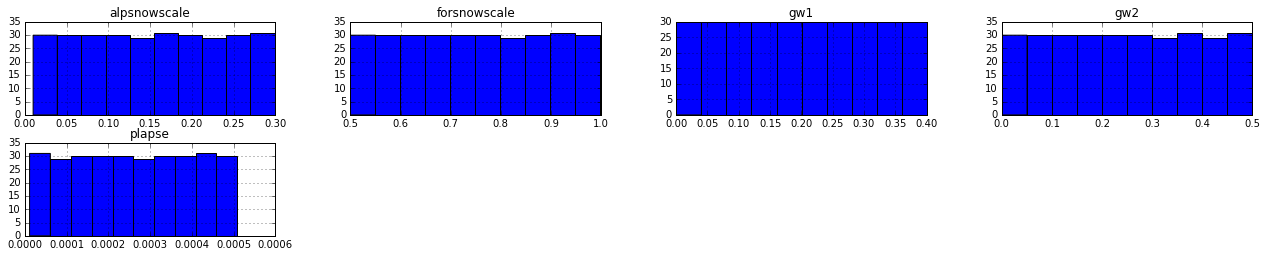

In [13]:
df.hist(figsize=(22,6),layout=(3,4));

In [14]:
# export the parameters
for name in names:
    np.savetxt('/RHESSys/Como/scripts/%s_%s.txt'%(calname,name),df[name].as_matrix(),fmt='%0.5f')